# This is a notebook to demonstrate some beginning analysis on the differences between weekend and weekday energy usage on the 41CS building. 

First, I will take a look at just the elevator usage across the year 2017. The time series is smoothed by only taking one sample per day (averaged across that day). For some reason it jumps in the beginning of May, but more or less the rest of the time series is reasonable.

In [2]:
import pandas as pd
import datetime as datetime

data = pd.read_csv("distribution_board_data/elevator.csv", header=None)
data.columns = ['Datetime', 'Energy']
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.head()


,Datetime,Energy
0,2017-01-01 03:29:00,0.0
1,2017-01-01 03:30:00,0.0
2,2017-01-01 03:31:00,0.0
3,2017-01-01 03:32:00,0.0
4,2017-01-01 03:33:00,0.0


In [3]:
data['Date'] = data['Datetime'].apply(lambda x: x.date())
data['Time'] = data['Datetime'].apply(lambda x: x.time())
data['year'] = data['Datetime'].apply(lambda x: x.year)     
data['month'] = data['Datetime'].apply(lambda x: x.month)
data['day'] = data['Datetime'].apply(lambda x: x.day)
data['hour'] = data['Datetime'].apply(lambda x: x.hour)
data.head()

,Datetime,Energy,Date,Time,year,month,day,hour
0,2017-01-01 03:29:00,0.0,2017-01-01,03:29:00,2017,1,1,3
1,2017-01-01 03:30:00,0.0,2017-01-01,03:30:00,2017,1,1,3
2,2017-01-01 03:31:00,0.0,2017-01-01,03:31:00,2017,1,1,3
3,2017-01-01 03:32:00,0.0,2017-01-01,03:32:00,2017,1,1,3
4,2017-01-01 03:33:00,0.0,2017-01-01,03:33:00,2017,1,1,3


In [4]:
daily_average = data.groupby('Date').mean()

In [5]:
daily_average.head()

,Energy,year,month,day,hour
Date,,,,,
2017-01-01,0.0,2017.0,1.0,1.0,13.235581
2017-01-02,0.0,2017.0,1.0,2.0,11.500000
2017-01-03,0.0,2017.0,1.0,3.0,11.500000
2017-01-04,0.0,2017.0,1.0,4.0,11.500000
2017-01-05,0.0,2017.0,1.0,5.0,11.496178


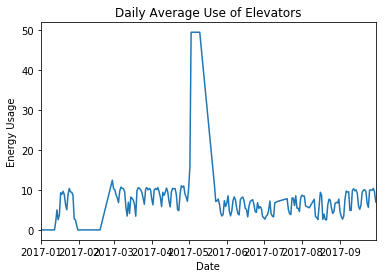

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
daily_average['Energy'].plot()
plt.title("Daily Average Use of Elevators")
plt.ylabel("Energy Usage")
plt.show()

In the graph above, we see the jump clearly in the beginning of May. Why is this? Finals? 

Next, we'll plot the same graph , only with all the distribution boards

# implement daily average graph process for all distribution boards

3rd floor lighting and plugs.csv
4th floor lighting and plugs.csv
4th floor mechanical 2nd,3rd,5th lighting and plugs.csv
6th floor lighting and plugs.csv
7th floor lighting and plugs.csv
7th floor mechanical, 8th and 9th lighting and plugs.csv
cellar power and lighting.csv
elevator.csv
retail.csv
roof mechanical.csv
sub-cellar power and lighting.csv
distribution_bds.csv


FileNotFoundError: File b'distribution_board_data/distribution_bds.csv' does not exist

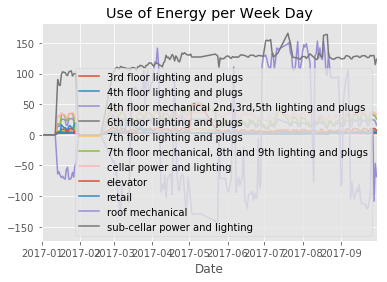

In [14]:

import pandas as pd
import datetime as datetime
import calendar
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import os

plt.figure()
plt.title("Use of Energy per Week Day" )
        
board_dfs = {}
directory = 'distribution_board_data/'
for dirname, directories, filenames in os.walk(directory):
    for filename in filenames:
        print( filename )

        data = pd.read_csv("{}{}".format(directory, filename), header=None)
        data.columns = ['Datetime', '{}'.format(filename[:-4])]
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data['Date'] = data['Datetime'].apply(lambda x: x.date())
        data['Time'] = data['Datetime'].apply(lambda x: x.time())
        data['year'] = data['Datetime'].apply(lambda x: x.year)     
        data['month'] = data['Datetime'].apply(lambda x: x.month)
        data['day'] = data['Datetime'].apply(lambda x: x.day)
        data['hour'] = data['Datetime'].apply(lambda x: x.hour)
        data['Weekday'] = data['Datetime'].apply(lambda x: calendar.day_name[x.weekday()])
        
        board_dfs['{}'.format(filename[:-4])] = data
        
        daily_average = board_dfs['{}'.format(filename[:-4])].groupby('Date').mean()
        daily_average['{}'.format(filename[:-4])].plot( legend='{}'.format(filename[:-4]) )   

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.ylabel("Energy Usage")
plt.show()

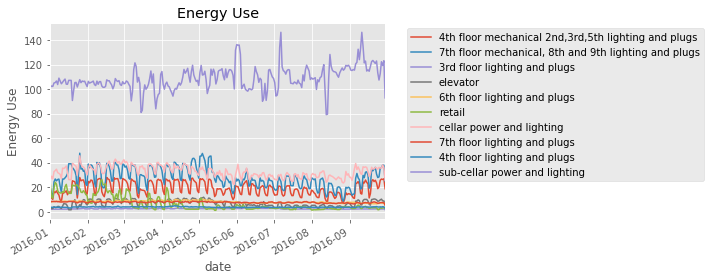

In [12]:

import pandas as pd
import datetime as datetime
import calendar
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import os


board_data = pd.read_csv('distribution_board_data/archive/distribution_bds.csv')
board_data['time'] = pd.to_datetime(board_data['time'])
board_data['date'] = board_data['time'].apply(lambda x: x.date())
board_data['Time'] = board_data['time'].apply(lambda x: x.time())
board_data['year'] = board_data['time'].apply(lambda x: x.year)     
board_data['month'] = board_data['time'].apply(lambda x: x.month)
board_data['day'] = board_data['time'].apply(lambda x: x.day)
board_data['hour'] = board_data['time'].apply(lambda x: x.hour)
board_data['Weekday'] = board_data['time'].apply(lambda x: calendar.day_name[x.weekday()])
board_data.head()
board_data['date'] = pd.to_datetime(board_data['date'], format='%Y-%m-%d')
smoothed_board_data = board_data.groupby('date').mean()
smoothed_board_data.head()

boards = {  '3rd floor lighting and plugs',
            '4th floor lighting and plugs',
            '4th floor mechanical 2nd,3rd,5th lighting and plugs',
            '6th floor lighting and plugs',
            '7th floor lighting and plugs',
            '7th floor mechanical, 8th and 9th lighting and plugs',
            'cellar power and lighting',
            'elevator',
            'retail',
#             'roof mechanical',
            'sub-cellar power and lighting'  }

plt.figure()
plt.title("Energy Use" )
plt.ylabel("Energy Use")

for board in boards:
    smoothed_board_data.loc[:'2016-9-30', board].plot( legend=board)

# weather.loc[:'2016-9-30', 'average temperature'].plot(color='b') 
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
# plt.tight_layout()
plt.savefig('powerpoint_pdfs\weekend/all_ts.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


So we see that there some strange thing happening at the beginning of May where pretty much all of the distribution boards besides "sub-cellar power and lighting" and "roof mechanical" report 50 units of energy usage. Weird.


Before we get into that, let's first check out the differences between each of the days of the week by grouping the data by day (e.g. monday, tuesday, wednesday, etc...) and then taking the average across each of the groups. 

In [15]:
all_data = pd.concat( [ df[['Weekday', board]].groupby('Weekday').mean() for board, df in board_dfs.items() ], axis=1 )
all_data


,"4th floor mechanical 2nd,3rd,5th lighting and plugs",3rd floor lighting and plugs,cellar power and lighting,elevator,7th floor lighting and plugs,4th floor lighting and plugs,sub-cellar power and lighting,6th floor lighting and plugs,roof mechanical,"7th floor mechanical, 8th and 9th lighting and plugs",retail
Weekday,,,,,,,,,,,
Friday,17.568805,2.176721,29.194691,8.328514,6.878240,3.311781,114.346427,6.044948,-10.046779,23.568428,3.486912
Monday,18.714627,2.157966,30.977327,8.403689,6.825694,3.268812,114.026493,6.146912,-20.619751,26.402481,3.659984
Saturday,13.934301,2.173343,27.793622,6.809950,6.808388,3.191496,114.470638,6.018286,-31.246053,20.072222,3.564360
Sunday,13.988639,2.153316,27.640543,5.929121,6.757464,3.163313,113.388241,5.993721,-23.758192,20.336535,3.444379
Thursday,19.586390,2.219674,30.879341,9.428992,6.934820,3.329082,114.550750,6.092775,1.459343,26.500568,3.546547
Tuesday,20.042826,2.181153,31.042658,9.246741,6.991452,3.232167,113.080221,6.170739,-6.842340,27.724424,3.615017
Wednesday,20.128937,2.208041,31.294789,9.534556,7.030143,3.296576,112.919163,6.151734,-1.606055,27.659879,3.612984


In [16]:
all_data = all_data.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

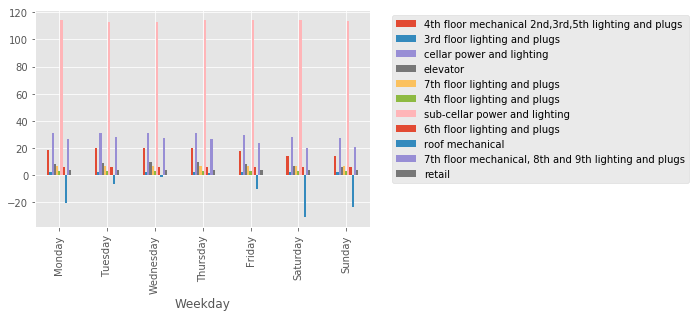

In [17]:
ax1 = all_data.plot.bar()
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)

Here we see the average energy use per day of the week. As expected, "roof mechanical" is the only distribution board reporting "negative" energy and most of the energy comes from the "sub cellar power and lighting" distribution board. 

In [18]:
for col in all_data:
    all_data[col] = 100*all_data[col] /  all_data[col].max()

all_data = all_data.clip(0,100)

In [19]:
all_data

,"4th floor mechanical 2nd,3rd,5th lighting and plugs",3rd floor lighting and plugs,cellar power and lighting,elevator,7th floor lighting and plugs,4th floor lighting and plugs,sub-cellar power and lighting,6th floor lighting and plugs,roof mechanical,"7th floor mechanical, 8th and 9th lighting and plugs",retail
Weekday,,,,,,,,,,,
Monday,92.973749,97.219937,98.985576,88.139277,97.091820,98.189602,99.542336,99.613868,0.0,95.231848,100.000000
Tuesday,99.572205,98.264569,99.194334,96.981353,99.449639,97.088851,98.716264,100.000000,0.0,100.000000,98.771367
Wednesday,100.000000,99.475885,100.000000,100.000000,100.000000,99.023568,98.575665,99.692018,0.0,99.767191,98.715834
Thursday,97.304643,100.000000,98.672468,98.892831,98.644076,100.000000,100.000000,98.736560,100.0,95.585642,96.900593
Friday,87.281336,98.064875,93.289303,87.350832,97.839260,99.480310,99.821631,97.961495,0.0,85.009621,95.271213
Saturday,69.225219,97.912701,88.812299,71.423887,96.845655,95.867162,99.930065,97.529420,0.0,72.399057,97.387306
Sunday,69.495170,97.010437,88.323146,62.185605,96.121295,95.020593,98.985159,97.131336,0.0,73.352417,94.109114


In [30]:
# temporary!!!!!
all_data = all_data.drop('roof mechanical', axis=1)

We want to compare the energy usage of the weekends vs the weekdays. I will first scale all the energy usages down looking at the proportion of energy spent on that day for a distribution board vs. the MAX energy spent on a distribution board over all the days of the week.

Below, we see that distribution boards are hitting their peak energy usage levels on Wednesday and Thursday, and it levels off towards the weekends. If you follow the elevator bars, it is pretty much a nice unimodal left skewed distribution. However, things like "4th floor mechanical 2nd, 3rd, 5th ligthing and plugs" doesn't change at all. 

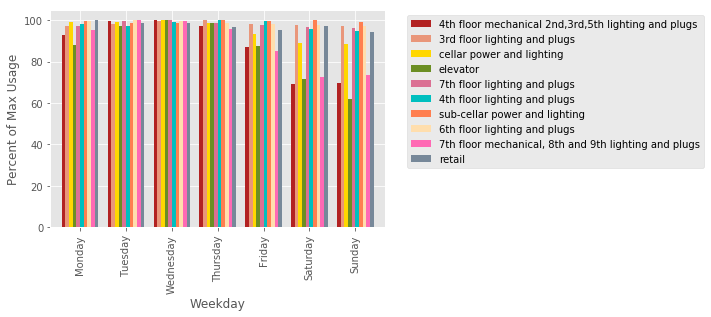

In [42]:
colors = ['firebrick', 
          'darksalmon', 
          'gold', 
          'olivedrab', 
          'palevioletred',
          'c',
          'coral',
         'navajowhite',
         'hotpink',
         'lightslategrey',]

ax1 = all_data.plot.bar(width=0.8, color=colors)
plt.ylabel('Percent of Max Usage')
lgd = ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.savefig('powerpoint_pdfs/weekend/max_usage.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

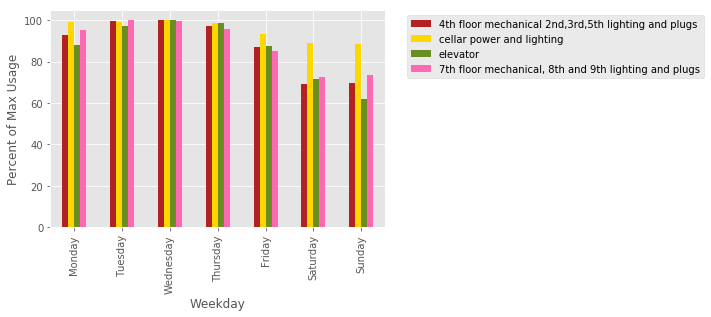

In [45]:
colors = ['firebrick', 
#           'darksalmon', 
          'gold', 
          'olivedrab', 
#           'palevioletred',
#           'c',
#           'coral',
#          'navajowhite',
         'hotpink',
#          'lightslategrey',
         ]

ax1 = all_data[ ['4th floor mechanical 2nd,3rd,5th lighting and plugs',
                'cellar power and lighting',
                'elevator',
                '7th floor mechanical, 8th and 9th lighting and plugs'] ].plot.bar(color=colors)
plt.ylabel('Percent of Max Usage')
lgd = ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.savefig('powerpoint_pdfs/weekend/max_usage_good.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

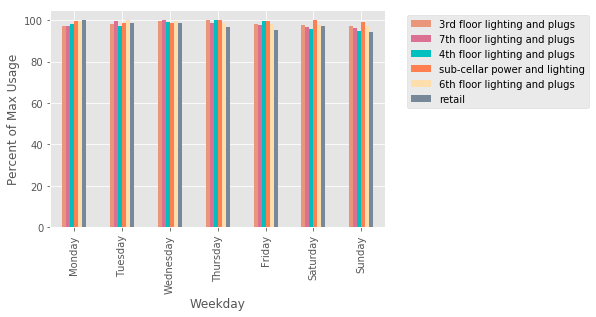

In [48]:
colors = [
#           'firebrick', 
          'darksalmon', 
#           'gold', 
#           'olivedrab', 
          'palevioletred',
          'c',
          'coral',
         'navajowhite',
#          'hotpink',
         'lightslategrey',
         ]

ax1 = all_data.drop(['4th floor mechanical 2nd,3rd,5th lighting and plugs',
                'cellar power and lighting',
                'elevator',
                '7th floor mechanical, 8th and 9th lighting and plugs'], axis=1).plot.bar( color=colors)
plt.ylabel('Percent of Max Usage')
lgd = ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.savefig('powerpoint_pdfs/weekend/max_usage_bad.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [17]:
100 - all_data.loc[['Sunday', 'Saturday']]

,roof mechanical,7th floor lighting and plugs,elevator,sub-cellar power and lighting,6th floor lighting and plugs,4th floor lighting and plugs,3rd floor lighting and plugs,"7th floor mechanical, 8th and 9th lighting and plugs",cellar power and lighting,"4th floor mechanical 2nd,3rd,5th lighting and plugs",retail
Weekday,,,,,,,,,,,
Sunday,100.0,3.878705,37.814395,1.014841,2.868664,4.979407,2.989563,26.647583,11.676854,30.504830,5.890886
Saturday,100.0,3.154345,28.576113,0.069935,2.470580,4.132838,2.087299,27.600943,11.187701,30.774781,2.612694


Next, let's actually get the ratio of weekend energy use and maximum weekday use for each distribution board. Now we can see how much, in PERCENTAGE, each distribution board uses in energy compared to the max energy usage it reaches during the week.

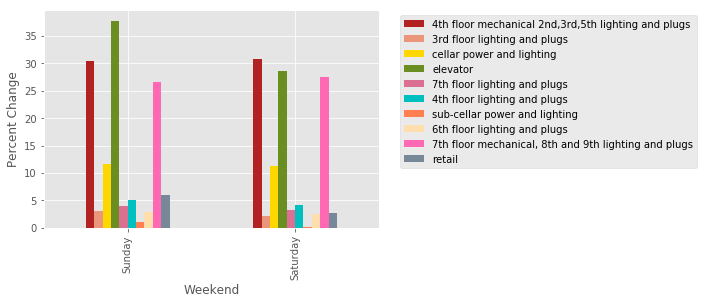

In [49]:
colors = ['firebrick', 
          'darksalmon', 
          'gold', 
          'olivedrab', 
          'palevioletred',
          'c',
          'coral',
         'navajowhite',
         'hotpink',
         'lightslategrey',]


ax2 = (100 - all_data.loc[['Sunday', 'Saturday']]).plot.bar(color=colors)
lgd = ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.ylabel('Percent Change')
plt.xlabel('Weekend')
plt.savefig('powerpoint_pdfs/weekend/weekend_usage_change.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

So, what we see is that 7th floor lighting and plugs don't change much, nor do most of the other lighting and plugs. The most change is found in the elevator, the 4th floor and 7th floor mechanical, and the 2nd,3rd,5th,8th,9th floor lighting and plugs. Perhaps we should concentrate on decreasing the usage of lightings and plugs.
